In [100]:
import matplotlib.pyplot as plt
import numpy as np
import scipy


In [101]:
def generic_grad(f,gf,lsearch,x0,D,max_iter):

    fs = [f(x0,D)]
    gs = [np.linalg.norm(gf(x0,D))]
    xk = x0
    gk = gf(xk,D)
    for i in range(max_iter):
        gk = gf(xk,D)
        tk = lsearch(f,xk,gk)
        xk = xk - tk*gk
        fs.append(f(xk,D))
        gs.append(np.linalg.norm(gk))
    return xk, fs, gs

def const_step(s):
    return lambda f, xk,gk: s

In [102]:
O = np.array([[1,0,0,-1,-1,-1,-1,-1,0],
     [0,1,-1,-1,-1,-1,-1,-1,-1],
     [1,1,-1,-1,-1,-1,-1,-1,-1],
     [0,0,-1,1,-1,-1,-1,-1,-1],
     [-1,-1,-1,1,1,1,1,1,0],
     [-1,-1,1,1,1,0,1,0,1],
     [-1,-1,1,1,1,1,1,1,1],
     [-1,-1,1,1,0,1,1,0,0]])
O

array([[ 1,  0,  0, -1, -1, -1, -1, -1,  0],
       [ 0,  1, -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0, -1,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  1,  1,  1,  1,  1,  0],
       [-1, -1,  1,  1,  1,  0,  1,  0,  1],
       [-1, -1,  1,  1,  1,  1,  1,  1,  1],
       [-1, -1,  1,  1,  0,  1,  1,  0,  0]])

In [103]:
def s(x,D):
     sum = 0
     for i in range(8):
          for j in range(8):
               sum+= (np.linalg.norm(x[i]-x[j])**2 - D[i][j]**2)**2
     return sum*0.5

def gs(x,D):
     vec = []
     for i in range(8):
          sum = 0
          for j in range(8):
               sum += (x[i]-x[j])*(np.linalg.norm(x[i]-x[j])**2 - D[i][j]**2)
          vec.append(sum)
     return np.array(vec)

In [104]:
t = 1/1000
x0 = np.random.rand(8,2)
D = scipy.spatial.distance_matrix(O,O)
xk, fs = generic_grad(s,gs,const_step(t),x0,D,max_iter=1000)

Text(0.5, 1.0, "O's configuration")

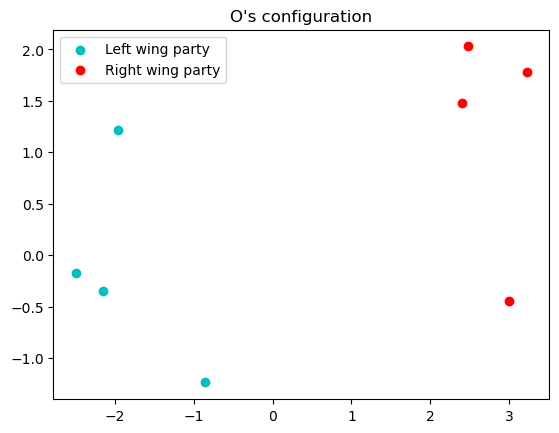

In [128]:
plt.scatter(xk[:4,0],xk[:4,1], color='c',label='Left wing party')
plt.scatter(xk[4:,0],xk[4:,1], color='r',label='Right wing party')
plt.legend()
plt.title("O's configuration")

Text(0.5, 1.0, 'S(x) values per Iteration')

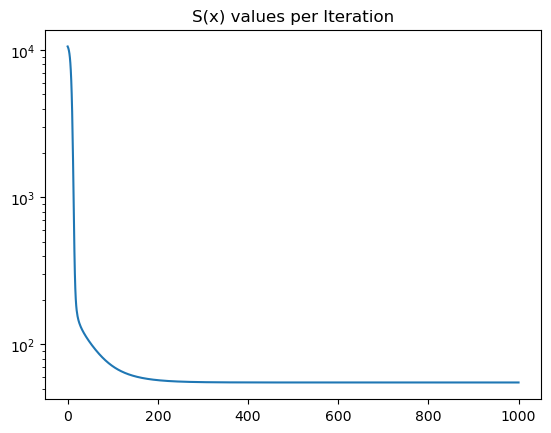

In [130]:
plt.semilogy(np.arange(len(fs)),fs)
plt.title('S(x) values per Iteration')